In [89]:
import pennylane as qml
import numpy as np

def U(wires):
    return qml.PhaseShift(13 * np.pi / 16, wires=wires) # 1/4 + 1/8 + 1/32 = 13/32


In [90]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=1)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=1), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)



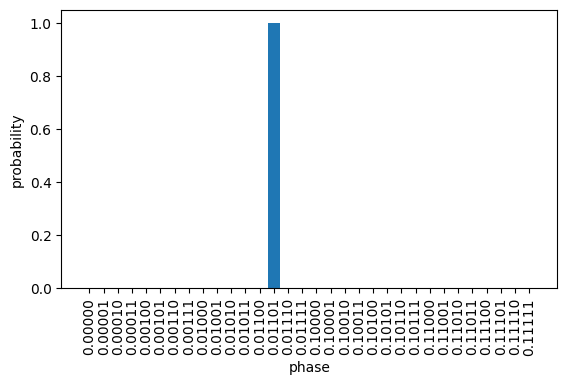

In [91]:
import matplotlib.pyplot as plt

estimation_wires = [0, 2, 3, 4, 5]

results = circuit_qpe(estimation_wires) # 0.01101

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()


In [92]:
drawer = qml.draw(circuit_qpe)
print(drawer(estimation_wires))

0: ──H─╭ControlledSequence(2.55)─╭QFT†─┤ ╭Probs
1: ──X─├ControlledSequence(2.55)─│─────┤ │     
2: ──H─├ControlledSequence(2.55)─├QFT†─┤ ├Probs
3: ──H─├ControlledSequence(2.55)─├QFT†─┤ ├Probs
4: ──H─├ControlledSequence(2.55)─├QFT†─┤ ├Probs
5: ──H─╰ControlledSequence(2.55)─╰QFT†─┤ ╰Probs


In [93]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe_test1(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=1)
    # qml.PauliX(wires=0)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    # qml.ControlledSequence(U(wires=0), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)



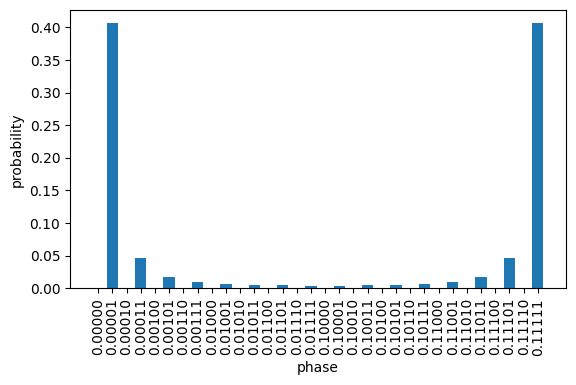

In [94]:
import matplotlib.pyplot as plt

estimation_wires = [1, 2, 3, 4, 5]

results = circuit_qpe_test1(estimation_wires) # 0.01101

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()


In [95]:
drawer = qml.draw(circuit_qpe_test1)
print(drawer(estimation_wires))

1: ──X──H─╭QFT†─┤ ╭Probs
2: ──H────├QFT†─┤ ├Probs
3: ──H────├QFT†─┤ ├Probs
4: ──H────├QFT†─┤ ├Probs
5: ──H────╰QFT†─┤ ╰Probs


In [96]:
import numpy as np
import pandas as pd
# from ace_tools import display_dataframe_to_user

# Define the Hadamard gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

# Basis states |0> and |1>
zero = np.array([1, 0])
one = np.array([0, 1])

# Build the 5-qubit state: H|1> ⊗ H|0> ⊗ H|0> ⊗ H|0> ⊗ H|0>
psi1 = np.kron(H @ one,
       np.kron(H @ zero,
       np.kron(H @ zero,
       np.kron(H @ zero, H @ zero))))

# Dimension and build the 5-qubit inverse QFT matrix
n = 5
N = 2**n
QFT_inv = np.zeros((N, N), dtype=complex)
for j in range(N):
    for k in range(N):
        QFT_inv[j, k] = np.exp(-2j * np.pi * j * k / N) / np.sqrt(N)

# Apply the inverse QFT to psi1
psi2 = QFT_inv @ psi1

# Prepare a DataFrame to display
df = pd.DataFrame({
    "Basis (binary)": [format(i, f'0{n}b') for i in range(N)],
    "Amplitude ψ1": np.round(psi1, 6),
    "Amplitude after QFT⁻¹": np.round(psi2, 6),
    "Probability": np.round(np.abs(psi2)**2, 6)
})

print(df)

   Basis (binary)  Amplitude ψ1  Amplitude after QFT⁻¹  Probability
0           00000      0.176777    -0.000000+0.000000j     0.000000
1           00001      0.176777     0.062500-0.634573j     0.406589
2           00010      0.176777    -0.000000-0.000000j     0.000000
3           00011      0.176777     0.062500-0.206035j     0.046357
4           00100      0.176777     0.000000+0.000000j     0.000000
5           00101      0.176777     0.062500-0.116929j     0.017579
6           00110      0.176777     0.000000+0.000000j     0.000000
7           00111      0.176777     0.062500-0.076156j     0.009706
8           01000      0.176777     0.000000+0.000000j     0.000000
9           01001      0.176777     0.062500-0.051292j     0.006537
10          01010      0.176777     0.000000+0.000000j     0.000000
11          01011      0.176777     0.062500-0.033407j     0.005022
12          01100      0.176777     0.000000+0.000000j     0.000000
13          01101      0.176777     0.062500-0.0